## Python statistics essential training - 04_03_bootstrapping

Standard imports

In [2]:
import math
import io

In [3]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [4]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [5]:
pop = pd.read_csv('grades.csv')

In [6]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   grade   100 non-null    float64
dtypes: float64(1)
memory usage: 928.0 bytes


In [8]:
pop.head()

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


<AxesSubplot:>

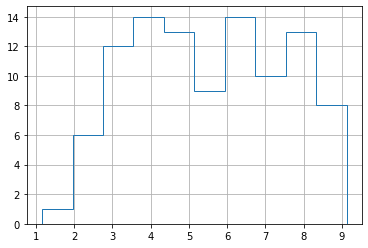

In [9]:
pop.grade.hist(histtype='step')

In [10]:
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


In [11]:
pop.sample(100, replace=True).describe()

,grade
count,100.000000
mean,5.437633
std,2.052553
min,1.160899
25%,3.765200
50%,5.485459
75%,7.387370
max,8.888042


In [19]:
bootstrap = pd.DataFrame({'meangrade': [pop.sample(100, replace=True).grade.mean() for i in range(1000)]})

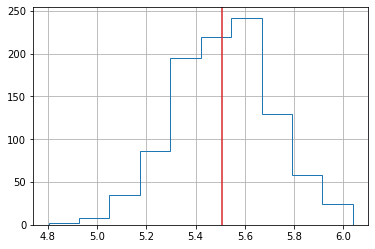

In [20]:
bootstrap.meangrade.hist(histtype='step')
pp.axvline(pop.grade.mean(), color='C3')

In [21]:
bootstrap.meangrade.quantile(0.025), bootstrap.meangrade.quantile(0.975)

(5.120572702438998, 5.899974154168137)

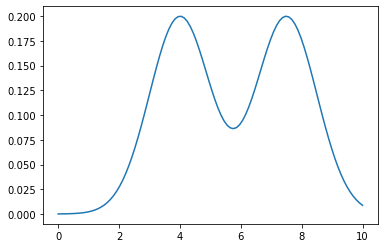

In [24]:
n1 = scipy.stats.norm(7.5, 1)
n2 = scipy.stats.norm(4, 1)

x = np.linspace(0, 10, 100)
pp.plot(x, 0.5*n1.pdf(x) + 0.5*n2.pdf(x))

In [27]:
def draw():
    while True:
        v = n1.rvs() if np.random.rand() < 0.5 else n2.rvs()
        if 0 <= v <= 10:
            return v

In [28]:
draw()

5.953526045168992

In [29]:
def dataset(n=100):
    return pd.DataFrame({'grade':[draw() for i in range(n)]})

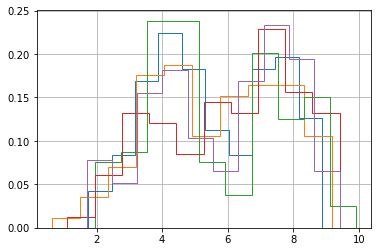

In [31]:
for i in range(5):
    dataset(100).grade.hist(histtype='step', density=True)

In [34]:
means = pd.DataFrame({'meangrade': [dataset(100).grade.mean() for i in range(1000)]})

<AxesSubplot:>

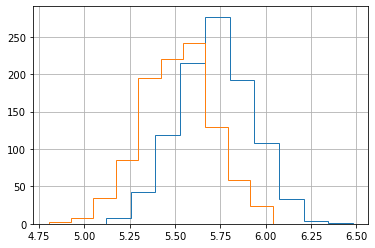

In [35]:
means.meangrade.hist(histtype='step')
bootstrap.meangrade.hist(histtype='step')